In [1]:
# Target - Stock market abbreviation: TGT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
ts = TimeSeries(key='your_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get Target stock data
TGT_data, metadata=ts.get_daily('TGT',outputsize='full')
TGT_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5227.000000,5227.000000,5227.000000,5227.000000,5.227000e+03
mean,58.164306,58.827471,57.483111,58.164574,5.782371e+06
std,19.043039,19.170035,18.942661,19.051645,3.825873e+06
min,22.750000,23.120000,21.620000,22.750000,2.928000e+05
25%,46.175000,46.800000,45.622400,46.205000,3.523900e+06
50%,55.640000,56.170000,55.030000,55.580000,4.670800e+06
75%,68.120000,68.890000,67.400500,68.245000,6.751232e+06
max,132.070000,134.110000,131.250000,132.940000,4.940040e+07


In [3]:
TGT_data.to_csv('TGT_data.csv')

In [4]:
TGT_data['date'] = TGT_data.index

In [5]:
TGT_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-10,132.07,134.11,131.25,132.94,3001591.0,2020-08-10
2020-08-07,129.24,131.88,129.00,131.75,2303110.0,2020-08-07
2020-08-06,129.50,129.93,128.13,129.01,1979947.0,2020-08-06
2020-08-05,130.75,131.93,128.66,129.37,3692285.0,2020-08-05
2020-08-04,127.93,130.77,127.58,130.45,3924491.0,2020-08-04
...,...,...,...,...,...,...
1999-11-05,65.00,65.69,64.75,65.38,1272300.0,1999-11-05
1999-11-04,63.25,64.19,62.31,63.94,2001400.0,1999-11-04
1999-11-03,64.00,64.56,62.38,63.25,1707700.0,1999-11-03


In [6]:
TGT_training_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/TGT_data.csv')

In [7]:
TGT_training_processed = TGT_training_complete.iloc[:, 1:2].values

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

TGT_training_scaled = scaler.fit_transform(TGT_training_processed)

In [9]:
features_set = []
labels = []
for i in range(60, 5226):
    features_set.append(TGT_training_scaled[i-60:i, 0])
    labels.append(TGT_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
model = Sequential()

In [14]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5166 samples
Epoch 1/100
5166/5166 [==============================] - 27s 5ms/sample - loss: 0.0080
Epoch 2/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0021
Epoch 3/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0021
Epoch 4/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0018
Epoch 5/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0015
Epoch 6/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0014
Epoch 7/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0013
Epoch 8/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0013
Epoch 9/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0012
Epoch 10/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0011
Epoch 11/100


5166/5166 [==============================] - 24s 5ms/sample - loss: 4.1048e-04
Epoch 87/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 3.8155e-04
Epoch 88/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.0977e-04
Epoch 89/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 3.8668e-04
Epoch 90/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.2835e-04
Epoch 91/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.1309e-04
Epoch 92/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.3914e-04
Epoch 93/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.3698e-04
Epoch 94/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.3107e-04
Epoch 95/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.2222e-04
Epoch 96/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 3.8020e-04
E

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
TGT_data2, metadata=ts.get_daily('TGT',outputsize='compact')
TGT_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,114.908199,116.662376,113.361097,115.011100,5.104004e+06
std,9.788997,9.354272,10.124590,9.746471,2.457219e+06
min,91.390000,94.130000,90.170000,91.040000,1.979947e+06
25%,108.740000,110.877500,107.385225,109.220000,3.517100e+06
50%,118.770000,120.205000,117.320000,118.625000,4.583773e+06
75%,121.042500,122.732500,119.705000,121.080000,6.182814e+06
max,132.070000,134.110000,131.250000,132.940000,1.648827e+07


In [21]:
TGT_data2.to_csv('TGT_data2.csv')

In [22]:
TGT_data2['date'] = TGT_data2.index

In [23]:
TGT_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-10,132.07,134.110,131.25,132.94,2959392.0,2020-08-10
2020-08-07,129.24,131.880,129.00,131.75,2303110.0,2020-08-07
2020-08-06,129.50,129.930,128.13,129.01,1979947.0,2020-08-06
2020-08-05,130.75,131.930,128.66,129.37,3692285.0,2020-08-05
2020-08-04,127.93,130.770,127.58,130.45,3924491.0,2020-08-04
...,...,...,...,...,...,...
2020-03-25,99.12,99.325,90.52,91.04,12552565.0,2020-03-25
2020-03-24,100.14,101.650,96.00,100.56,6497661.0,2020-03-24
2020-03-23,96.55,99.200,93.81,96.69,7103271.0,2020-03-23


In [24]:
TGT_testing_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/TGT_data2.csv')
TGT_testing_processed = TGT_testing_complete.iloc[:, 1:2].values

In [25]:
TGT_total = pd.concat((TGT_training_complete['1. open'], TGT_testing_complete['1. open']), axis=0)

In [26]:
test_inputs = TGT_total[len(TGT_total) - len(TGT_testing_complete) - 60:].values

In [27]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [33]:
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [34]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [35]:
predictions = model.predict(test_features)

In [36]:
predictions = scaler.inverse_transform(predictions)

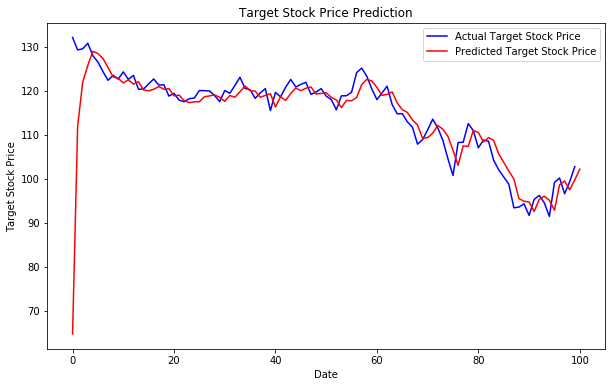

In [37]:
# Plot the results -model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(TGT_testing_processed, color='blue', label='Actual Target Stock Price')
plt.plot(predictions , color='red', label='Predicted Target Stock Price')
plt.title('Target Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Target Stock Price')
plt.legend()
plt.show()